In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import math

from matplotlib import cm


import warnings
warnings.filterwarnings('ignore')

In [2]:
__=pd.read_csv('./terrorism_new.csv',encoding='ISO-8859-1')

In [3]:
terror=__
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [5]:
terror.groupby("Month").size()

Month
0        20
1     15839
2     14626
3     16013
4     15994
5     17827
6     16198
7     17165
8     16565
9     14939
10    16455
11    15643
12    14180
dtype: int64

In [5]:
# terror["Year"] = terror["Year"].map(lambda x: round(x/3)*3)
terror["Year"] = terror['Year'].astype('int64')

In [6]:
years_list = terror.groupby('Year').size().index.tolist()
region_list = ['Central America & Caribbean', 'Middle East & North Africa', 
               'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

print(years_list)
print(region_list)

#  Australasia & Oceania, Central Asia, East Asia


[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['Central America & Caribbean', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']


In [7]:
year_region_dict = terror.groupby(['Year', 'Region']).size().to_dict()
print(year_region_dict)

{(1970, 'Australasia & Oceania'): 1, (1970, 'Central America & Caribbean'): 7, (1970, 'East Asia'): 2, (1970, 'Eastern Europe'): 12, (1970, 'Middle East & North Africa'): 28, (1970, 'North America'): 472, (1970, 'South America'): 65, (1970, 'South Asia'): 1, (1970, 'Southeast Asia'): 10, (1970, 'Sub-Saharan Africa'): 3, (1970, 'Western Europe'): 50, (1971, 'Australasia & Oceania'): 1, (1971, 'Central America & Caribbean'): 5, (1971, 'East Asia'): 1, (1971, 'Eastern Europe'): 5, (1971, 'Middle East & North Africa'): 55, (1971, 'North America'): 247, (1971, 'South America'): 24, (1971, 'Southeast Asia'): 6, (1971, 'Sub-Saharan Africa'): 2, (1971, 'Western Europe'): 125, (1972, 'Australasia & Oceania'): 8, (1972, 'Central America & Caribbean'): 3, (1972, 'Eastern Europe'): 1, (1972, 'Middle East & North Africa'): 53, (1972, 'North America'): 73, (1972, 'South America'): 33, (1972, 'South Asia'): 1, (1972, 'Southeast Asia'): 16, (1972, 'Sub-Saharan Africa'): 4, (1972, 'Western Europe'): 37

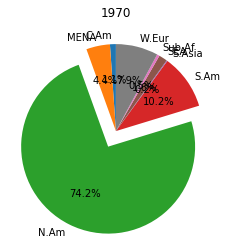

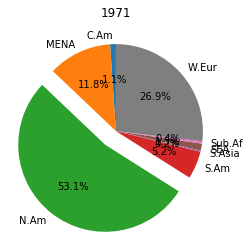

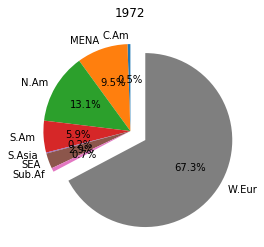

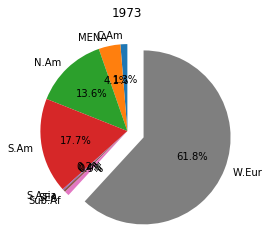

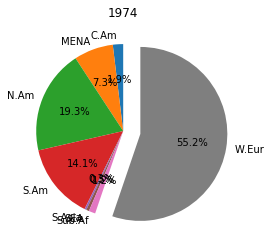

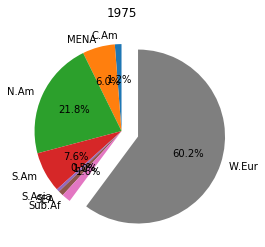

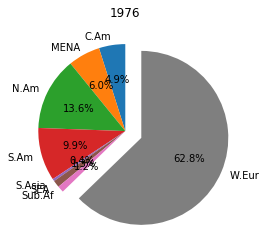

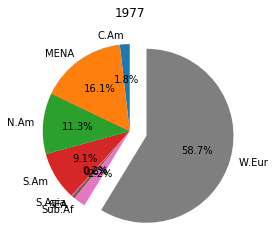

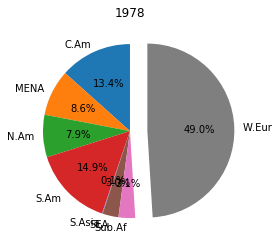

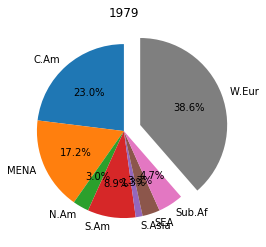

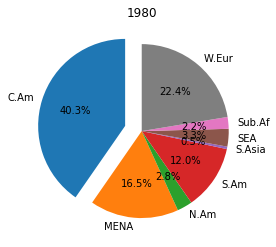

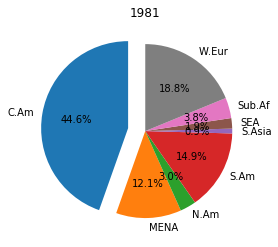

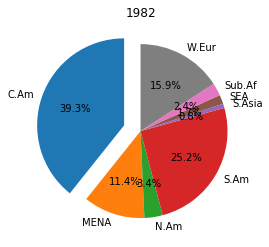

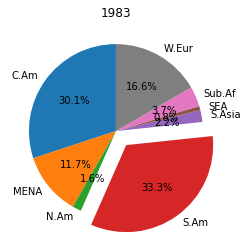

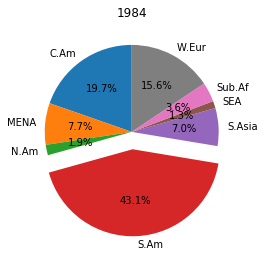

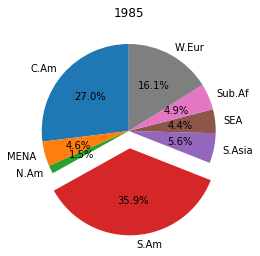

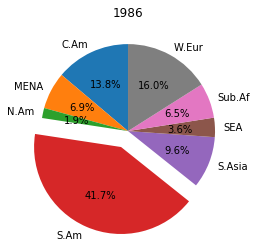

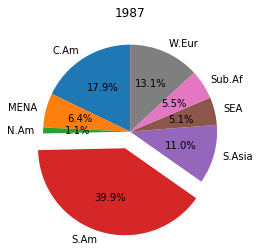

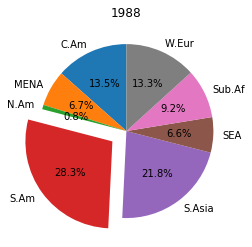

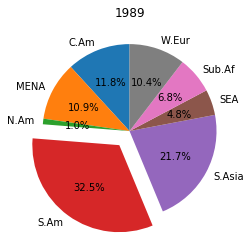

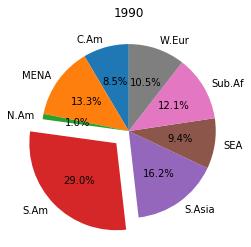

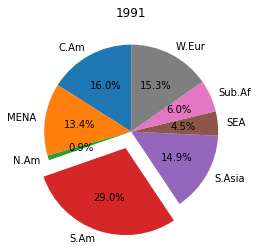

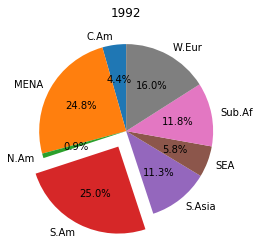

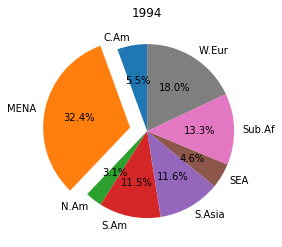

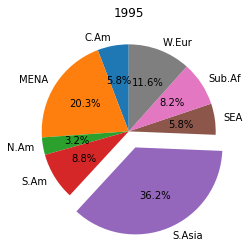

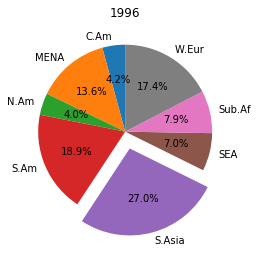

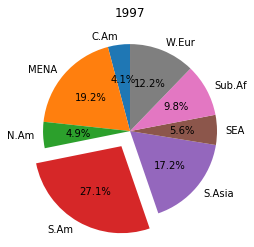

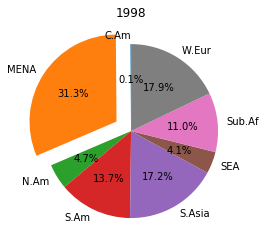

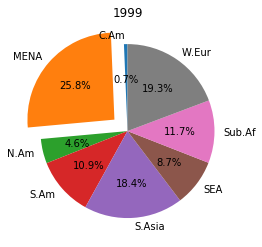

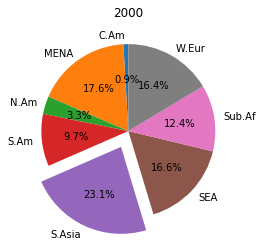

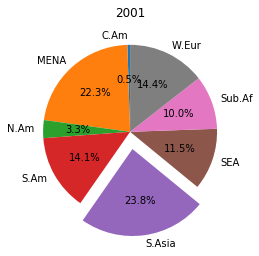

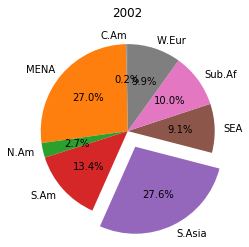

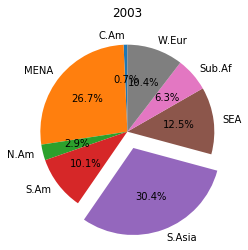

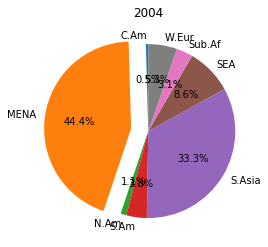

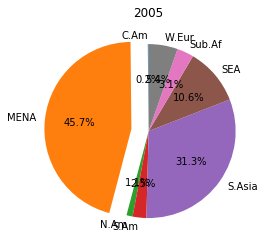

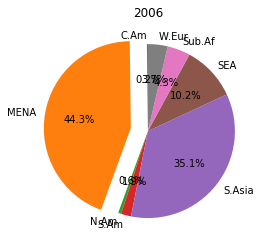

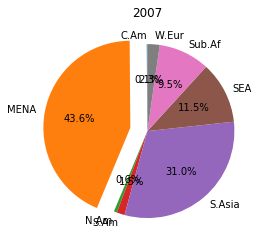

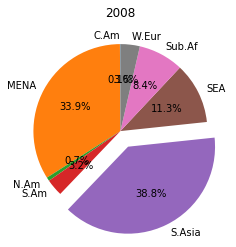

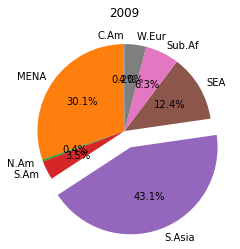

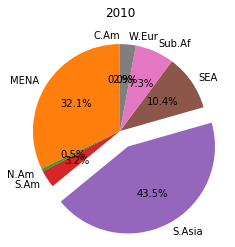

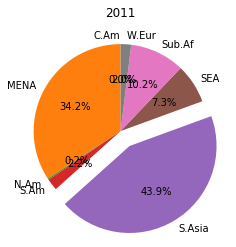

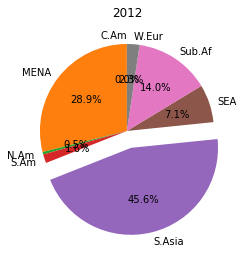

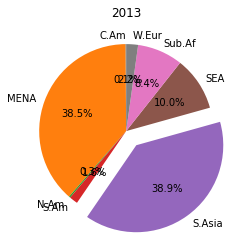

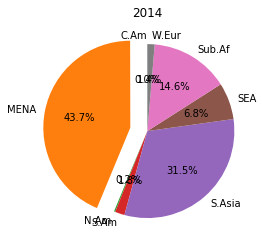

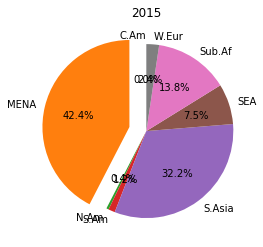

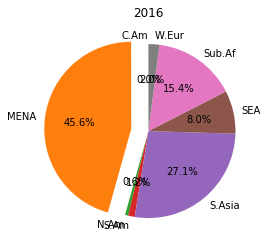

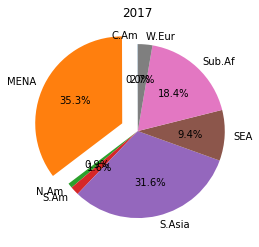

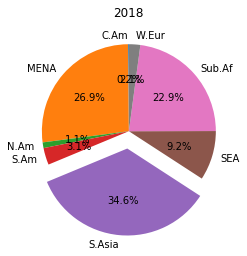

In [36]:
size = [0,0,0,0,0,0,0,0]
region_index = {'Central America & Caribbean': 0,
               'Middle East & North Africa': 1,
               'North America':2,
               'South America':3,
               'South Asia':4, 
               'Southeast Asia':5,
               'Sub-Saharan Africa':6, 
               'Western Europe':7}


for y in years_list:
    labels = ['C.Am', 'MENA', 'N.Am', 'S.Am', 'S.Asia', 'SEA', 'Sub.Af', 'W.Eur']
    

    
    for r in region_list:
        val = year_region_dict.get((y,r), None)
        if val:
            count = size[region_index[r]]
            count += val
            size.pop(region_index[r])
            size.insert(region_index[r], val)


    fig1, ax1 = plt.subplots()

    cs=cm.Set1(np.arange(40)/40.)
    ax1.pie(size, labels=labels, explode=[(_ == max(size)) * 0.2 for _ in size],autopct='%1.1f%%', startangle=90)
    ax1.set_title(str(y))
    plt.savefig("./pieanimation/"+ str(y) +'.png')
    plt.show()
    
    

In [37]:
import imageio
import os
print(os.getcwd())
pieanimation = os.getcwd() + "/pieanimation"

files = []

for filename in os.listdir(pieanimation):
    filename = pieanimation + "/" + filename
    files.append(filename)

files.sort()

images = []
for f in files:
    print(f)
    images.append(imageio.imread(f))

imageio.mimsave('movie.gif', images, duration=0.4)

/Users/yeeeeehan/Desktop/CZ 4032/Project
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1970.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1971.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1972.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1973.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1974.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1975.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1976.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1977.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1978.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1979.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1980.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1981.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1982.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1983.png
/Users/yeeeeehan/Desktop/CZ 4032/Project/pieanimation/1984.png
/Users/yeeeeeh

In [39]:
# ffmpeg -f image2 -r 5 -pattern_type glob -i '*.png' -vcodec mpeg4 -y 5.mp4

32512

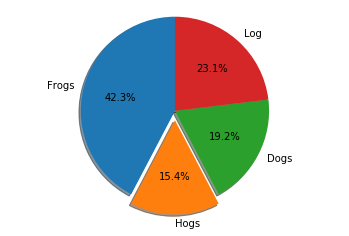

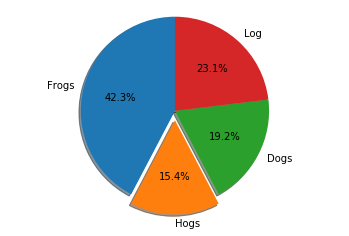

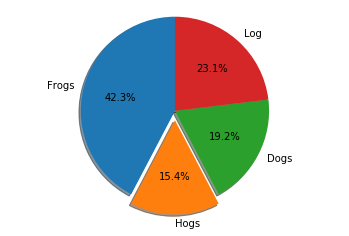

In [19]:
for i in range(3):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Frogs', 'Hogs', 'Dogs', 'Log'
    sizes = [11,4, 5 ,6]
    explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()

    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.savefig(str(i) +'.png')
    plt.show()
